# Interactive gaussian anamorphosis modeling with hermite polynomials

Adrian Martinez Vargas
Adrian.Martinez@csaglobal.com
PhD in Geological Sciences. Senior Consultant.
CSA Global,
Toronto, Canada.



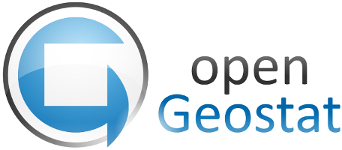

In [1]:
#general imports
import pygslib    
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

#make the plots inline
%matplotlib inline
#%matplotlib notebook

In [2]:
#get the data in gslib format into a pandas Dataframe
data= pd.DataFrame({'Z':[2.582,3.087,3.377,3.974,4.321,5.398,8.791,12.037,12.586,16.626]})
data['Declustering Weight'] = 1.0
data

,Z,Declustering Weight
0,2.582,1.0
1,3.087,1.0
2,3.377,1.0
3,3.974,1.0
4,4.321,1.0
5,5.398,1.0
6,8.791,1.0
7,12.037,1.0
8,12.586,1.0
9,16.626,1.0


## Interactive anamorphosis modeling

Raw Variance 21.85265809
Variance from PCI 21.4928086061
zamin 2.58401342374
zamax 16.2246489874
yamin -1.41528305661
yamax 1.64332866573
zpmin 2.58326581548
zpmax 16.6158734762
ypmin -1.64332866573
ypmax 1.64332866573


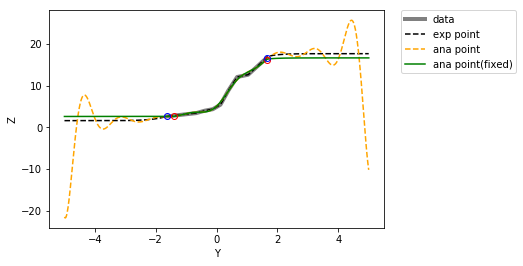

In [3]:
# Fit anamorphosis by changing, zmax, zmin, and extrapolation function
PCI, H, raw, zana, gauss, z, raw_var, PCI_var, ax1 = pygslib.nonlinear.anamor(
                 z = data['Z'], 
                 w = data['Declustering Weight'], 
                 zmin = data['Z'].min()-1, 
                 zmax = data['Z'].max()+1,
                 ymin=-5, ymax=5,
                 ndisc = 5000,
                 ltail=1, utail=2, ltpar=1, utpar=2, K=30)

In [4]:
PCI

array([  7.27790000e+00,  -4.30395296e+00,   1.14608711e+00,
         7.88963802e-01,  -6.67829322e-01,  -2.62116137e-01,
         4.08609698e-01,   1.38244581e-01,  -2.63468216e-01,
        -1.11754971e-01,   1.85021977e-01,   1.07544530e-01,
        -1.46162513e-01,  -1.04079338e-01,   1.30072230e-01,
         9.59684293e-02,  -1.26102357e-01,  -8.30701899e-02,
         1.27579287e-01,   6.68064690e-02,  -1.30462525e-01,
        -4.88396830e-02,   1.32463081e-01,   3.06124662e-02,
        -1.32444281e-01,  -1.32201514e-02,   1.30008839e-01,
        -2.58754749e-03,  -1.25213752e-01,   1.63582525e-02,
         1.18374810e-01])

## Block support transformation

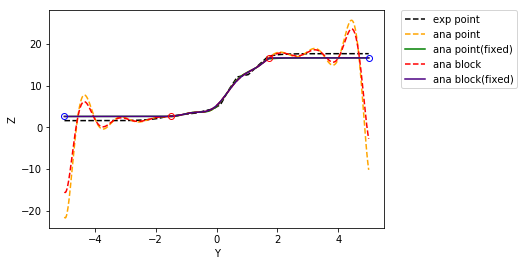

In [5]:
ZV = pygslib.nonlinear.anamor_blk( PCI, H, r = 0.99, gauss = gauss, Z = z,
                  ltail=1, utail=1, ltpar=1, utpar=1,
                  raw=raw, zana=zana)

## Anamorphosis modeling from raw Z,Y pairs

Raw Variance 21.85265809
Variance from PCI 17.7114662546


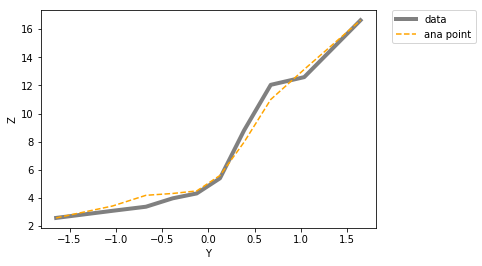

In [6]:
PCI, H, raw, zana, gauss, raw_var, PCI_var, ax2 = pygslib.nonlinear.anamor_raw(
                         z = data['Z'], 
                         w = data['Declustering Weight'], 
                         K=30)

In [7]:
PCI

array([  7.27790000e+00,  -3.82759336e+00,   1.24799451e+00,
         6.92707152e-01,  -6.28915708e-01,  -2.09662489e-01,
         3.54248744e-01,   9.63864927e-02,  -2.37930194e-01,
        -7.09406273e-02,   1.98369413e-01,   6.10707998e-02,
        -1.93103671e-01,  -4.65978068e-02,   1.99154287e-01,
         2.41314403e-02,  -2.04493057e-01,   4.12778575e-03,
         2.03539527e-01,  -3.45670477e-02,  -1.94519949e-01,
         6.37931546e-02,   1.77830408e-01,  -8.92156210e-02,
        -1.54998367e-01,   1.09170439e-01,   1.28023728e-01,
        -1.22843431e-01,  -9.89695792e-02,   1.30114975e-01,
         6.97202334e-02])

In [8]:
print zana

[  2.582        3.42678628   4.18832472   4.31839029   4.499497
   5.60005213   7.95648663  10.99765187  13.13519958  16.626     ]
